# Refer to SF EDA notebook for Price EDA (Section 5 & 10)

# Import Libraries

In [1]:
# pip install -r "../requirements.txt"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import Data

In [3]:
SF_df = pd.read_pickle("remove_features_without_encoding.pkl")
SF_df.tail(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,game console,stair gates,fireplace guards,pocket wifi,changing table,window guards,beach essentials,ev charger,beachfront,bread maker
6804,-,0.0,1.00,0,3,Visitacion Valley,Entire guesthouse,Entire home/apt,2,1.0,...,0,0,0,0,0,0,0,0,0,0
6805,-,0.0,1.00,0,0,Visitacion Valley,Entire guest suite,Entire home/apt,2,1.0,...,0,0,0,0,0,1,0,0,0,0
6806,within an hour,1.0,1.00,0,0,Visitacion Valley,Private room in apartment,Private room,4,1.0,...,0,0,0,0,0,0,0,0,0,0
6807,within an hour,1.0,0.97,1,6,Visitacion Valley,Entire apartment,Entire home/apt,10,3.0,...,1,1,1,0,0,0,0,0,0,0
6808,within an hour,1.0,1.00,1,2,Visitacion Valley,Entire house,Entire home/apt,4,2.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   host_response_time          6809 non-null   object 
 1   host_response_rate          6809 non-null   float64
 2   host_acceptance_rate        6809 non-null   float64
 3   host_is_superhost           6809 non-null   int32  
 4   host_listings_count         6809 non-null   int64  
 5   neighbourhood_cleansed      6809 non-null   object 
 6   property_type               6809 non-null   object 
 7   room_type                   6809 non-null   object 
 8   accommodates                6809 non-null   int64  
 9   bathrooms                   6809 non-null   float64
 10  amenities                   6809 non-null   object 
 11  price                       6809 non-null   float64
 12  minimum_nights              6809 non-null   int64  
 13  review_scores_rating        6809 

# Different column type name lists

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = SF_df.select_dtypes(include=numerics).columns.to_list()
bool_columns = SF_df.select_dtypes(include='bool').columns.to_list()
object_columns = SF_df.select_dtypes(include='object').columns.to_list()
print(f"No. of numeric cols: {len(numeric_columns)}")
print(f"No. of boolean cols: {len(bool_columns)}")
print(f"No. of object cols: {len(object_columns)}")
print(f"Total: {len(numeric_columns)+len(bool_columns)+len(object_columns)}")
print("Object Columns :",object_columns)

No. of numeric cols: 75
No. of boolean cols: 0
No. of object cols: 5
Total: 80
Object Columns : ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities']


In [6]:
SF_df.isnull().sum()

host_response_time      0
host_response_rate      0
host_acceptance_rate    0
host_is_superhost       0
host_listings_count     0
                       ..
window guards           0
beach essentials        0
ev charger              0
beachfront              0
bread maker             0
Length: 80, dtype: int64

## Transforming categorical columns to numeric columns and combine all into new df

In [7]:
new_SF_df = SF_df[numeric_columns]
new_SF_df.shape

(6809, 75)

In [8]:
for categorical_col in object_columns[:-1]:
    new_SF_df = pd.concat([new_SF_df, pd.get_dummies(SF_df[categorical_col])], axis=1)

In [9]:
new_SF_df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,price,minimum_nights,review_scores_rating,reviews_per_month,...,Shared room in hostel,Shared room in house,Shared room in loft,Shared room in townhouse,Shared room in villa,Tiny house,Entire home/apt,Hotel room,Private room,Shared room
0,1.00,0.99,1,1,3,1.0,132.0,2,97.0,1.91,...,0,0,0,0,0,0,1,0,0,0
1,0.97,0.79,1,38,5,2.0,166.0,30,91.0,0.15,...,0,0,0,0,0,0,1,0,0,0
2,0.50,0.76,1,3,2,1.0,130.0,2,97.0,3.92,...,0,0,0,0,0,0,0,0,1,0
3,0.50,0.76,1,3,2,1.0,110.0,2,98.0,3.73,...,0,0,0,0,0,0,0,0,1,0
4,1.00,1.00,0,2,10,2.0,480.0,3,91.0,0.32,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,0.00,1.00,0,3,2,1.0,179.0,2,100.0,0.47,...,0,0,0,0,0,0,1,0,0,0
6805,0.00,1.00,0,0,2,1.0,190.0,30,100.0,0.48,...,0,0,0,0,0,0,1,0,0,0
6806,1.00,1.00,0,0,4,1.0,85.0,1,100.0,0.34,...,0,0,0,0,0,0,0,0,1,0
6807,1.00,0.97,1,6,10,3.0,451.0,2,0.0,0.00,...,0,0,0,0,0,0,1,0,0,0


In [10]:
new_SF_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
new_SF_df.columns.values[169] = "Private room (Room Type)"
new_SF_df.columns.values[169]

'Private room (Room Type)'

In [12]:
new_SF_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
print(new_SF_df.duplicated().any())
if new_SF_df.duplicated().any():
    duplicate_rows = new_SF_df[new_SF_df.duplicated()]
    print(duplicate_rows)
    new_SF_df = new_SF_df.drop_duplicates()
    print("Duplicates Removed")
print(new_SF_df.duplicated().any())

True
      host_response_rate  host_acceptance_rate  host_is_superhost  \
353                 1.00                  1.00                  0   
456                 0.97                  0.95                  0   
1109                0.90                  0.97                  0   
1127                0.97                  0.95                  0   
1599                1.00                  1.00                  0   
1611                0.60                  0.79                  0   
1622                0.60                  0.79                  0   
1700                0.97                  0.95                  0   
1729                1.00                  1.00                  0   
1740                1.00                  1.00                  0   
1943                1.00                  1.00                  0   
1944                1.00                  1.00                  0   
2059                0.00                  0.00                  0   
2087                0.00     

False


In [14]:
new_SF_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 0 to 6808
Columns: 171 entries, host_response_rate to Shared room
dtypes: float64(8), int32(1), int64(66), uint8(96)
memory usage: 4.5 MB


In [53]:

# new_SF_df.to_pickle('FINAL_price_df.pkl',protocol=3)

price_df = pd.read_pickle('FINAL_price_df.pkl')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 0 to 6808
Columns: 171 entries, host_response_rate to Shared room
dtypes: float64(8), int32(1), int64(66), uint8(96)
memory usage: 4.5 MB


# Train/Test split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y = new_SF_df['price'] # target/dependent variable
x = new_SF_df.drop(['price','price_log'], axis =1) # independent variables

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

# Random Forest

## Train/Test w Random Forest Algorithm

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 70.221
R^2 test: 0.587


## Feature Importance of Random Forest Algorithm

In [17]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
4,accommodates,0.303752
6,minimum_nights,0.083701
8,reviews_per_month,0.076612
5,bathrooms,0.065231
165,Entire home/apt,0.037055
3,host_listings_count,0.030639
9,SafeIndex_Score,0.026715
1,host_acceptance_rate,0.026298
7,review_scores_rating,0.018408
27,dishwasher,0.016726


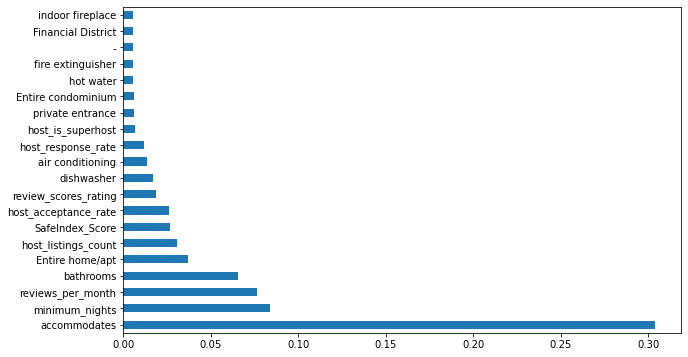

In [18]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

# LightGBM

## Train/Test w LightGBM

In [19]:
from lightgbm import LGBMRegressor

fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Training until validation scores don't improve for 20 rounds
[100]	valid's rmse: 80.9619
[200]	valid's rmse: 73.1059
[300]	valid's rmse: 70.3628
[400]	valid's rmse: 68.7306
[500]	valid's rmse: 67.9007
[600]	valid's rmse: 67.5236
[700]	valid's rmse: 67.3786
[800]	valid's rmse: 67.2843
Early stopping, best iteration is:
[839]	valid's rmse: 67.2552
R^2 test: 0.621


## Feature Importance of LightGBM

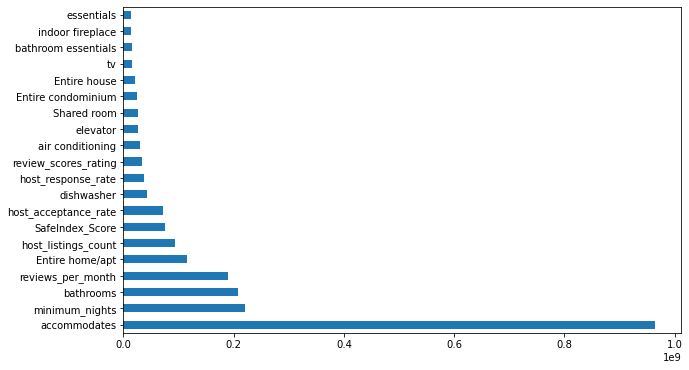

In [20]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

In [21]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = x.columns
coefs_df['coefs'] = clf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
4,accommodates,9.642815e+08
6,minimum_nights,2.203730e+08
5,bathrooms,2.075942e+08
8,reviews_per_month,1.890644e+08
165,Entire home/apt,1.150415e+08
3,host_listings_count,9.365119e+07
9,SafeIndex_Score,7.458065e+07
1,host_acceptance_rate,7.183495e+07
27,dishwasher,4.276984e+07
0,host_response_rate,3.703861e+07


# Gradient Boosting

## Train/Test w Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor


gboost = GradientBoostingRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3)
gboost.fit(X_train, y_train)
y_train_pred = gboost.predict(X_train)
y_test_pred = gboost.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 68.332
R^2 test: 0.608


## Feature Importance of Gradient Boosting

In [23]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = gboost.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
4,accommodates,0.382362
6,minimum_nights,0.103475
5,bathrooms,0.075415
165,Entire home/apt,0.047558
8,reviews_per_month,0.045851
3,host_listings_count,0.035951
9,SafeIndex_Score,0.021914
1,host_acceptance_rate,0.021611
35,elevator,0.017041
27,dishwasher,0.016156


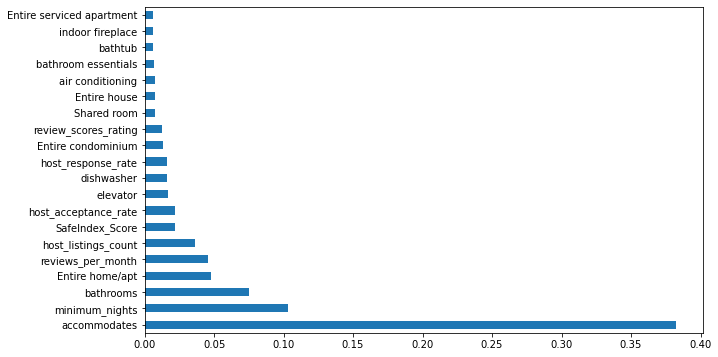

In [24]:
feat_imp = pd.Series(gboost.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

# XGBoost and its Feature Importance


Training MSE: 940.169
Validation MSE: 4923.8532
Validation RMSE: 70.1702

Training r2: 0.9261
Validation r2: 0.5871


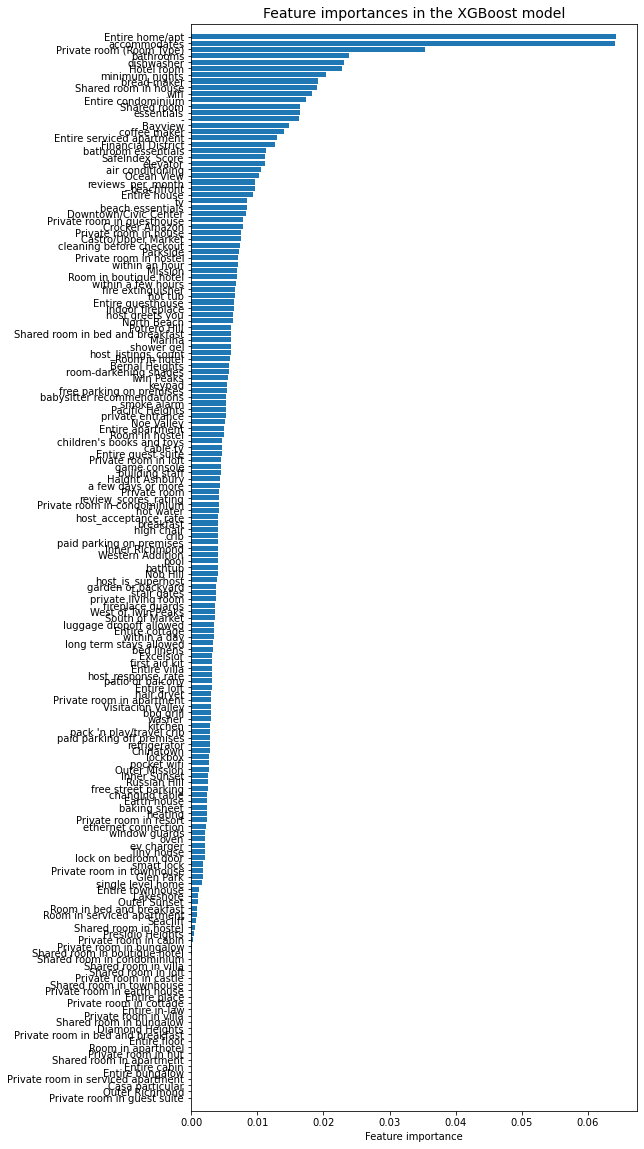

In [25]:
import xgboost as xgb

# Fitting the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

# Printing the results

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_xgb_reg)**0.5,4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# Neural Network Model

In [26]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(512, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 252,673
Trainable params: 252,673
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 24538.6562 - mean_squared_error: 2453

18/18 [==============================] - 0s 8ms/step - loss: 4075.0510 - mean_squared_error: 4075.0510 - val_loss: 4615.0620 - val_mean_squared_error: 4615.0620
Epoch 43/100
18/18 [==============================] - 0s 10ms/step - loss: 4095.9238 - mean_squared_error: 4095.9238 - val_loss: 4375.6318 - val_mean_squared_error: 4375.6318
Epoch 44/100
18/18 [==============================] - 0s 11ms/step - loss: 4002.6838 - mean_squared_error: 4002.6838 - val_loss: 5467.1157 - val_mean_squared_error: 5467.1157
Epoch 45/100
18/18 [==============================] - 0s 10ms/step - loss: 4050.7852 - mean_squared_error: 4050.7852 - val_loss: 4794.1973 - val_mean_squared_error: 4794.1973
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 3885.7041 - mean_squared_error: 3885.7041 - val_loss: 5462.2817 - val_mean_squared_error: 5462.2817
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 3908.4053 - mean_squared_error: 3908.4053 - val_loss: 4624.3193 - 

18/18 [==============================] - 0s 8ms/step - loss: 2625.8127 - mean_squared_error: 2625.8127 - val_loss: 5400.0913 - val_mean_squared_error: 5400.0913
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 2829.3928 - mean_squared_error: 2829.3928 - val_loss: 5833.7329 - val_mean_squared_error: 5833.7329
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 2940.9109 - mean_squared_error: 2940.9109 - val_loss: 4984.5459 - val_mean_squared_error: 4984.5459
Epoch 92/100
18/18 [==============================] - 0s 11ms/step - loss: 2786.9192 - mean_squared_error: 2786.9192 - val_loss: 5263.2886 - val_mean_squared_error: 5263.2886
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 2811.5603 - mean_squared_error: 2811.5603 - val_loss: 4973.0776 - val_mean_squared_error: 4973.0776
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 2736.1482 - mean_squared_error: 2736.1482 - val_loss: 5403.0913 - v

In [27]:
y_test_pred = nn2.predict(X_test)
y_train_pred = nn2.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_test_pred)**0.5,4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 2652.9685
Validation MSE: 5718.8162
Validation RMSE: 75.6229

Training r2: 0.7914
Validation r2: 0.5204


# Distribution of Numeric Columns

<ipython-input-28-e0fb9fbfefe6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_SF_df[col] = pd.to_numeric(new_SF_df[col])
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


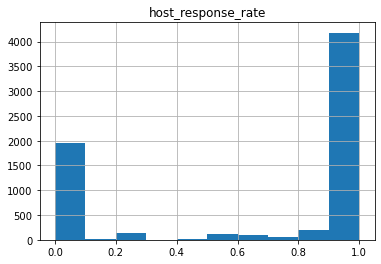

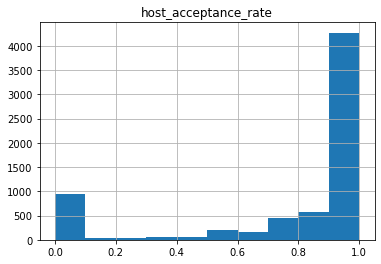

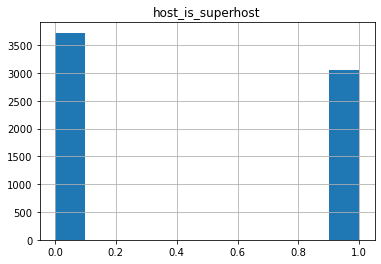

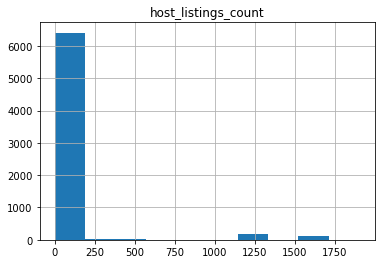

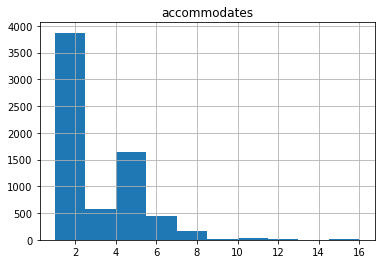

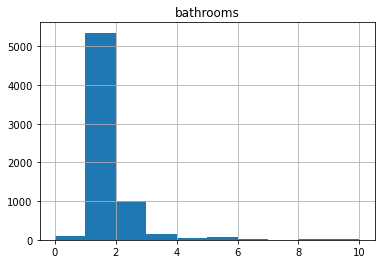

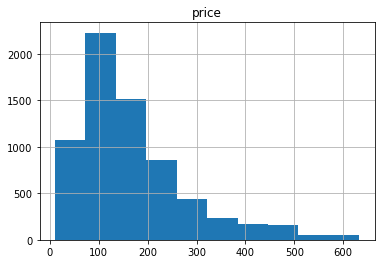

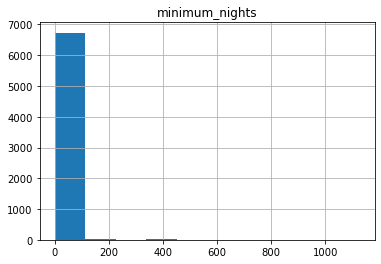

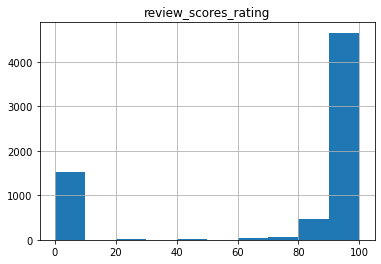

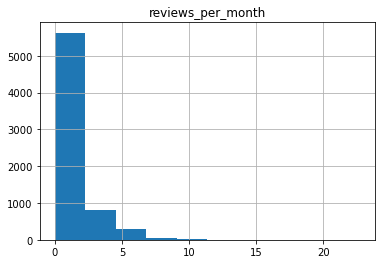

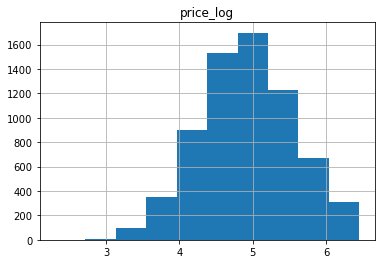

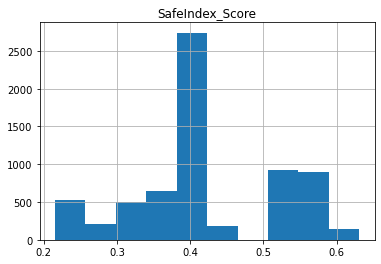

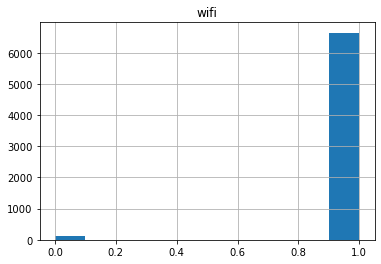

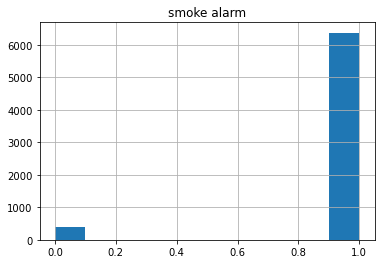

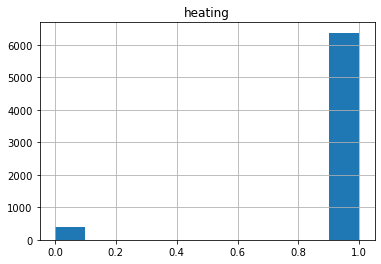

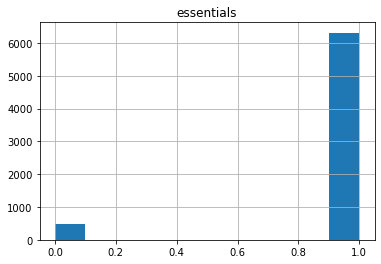

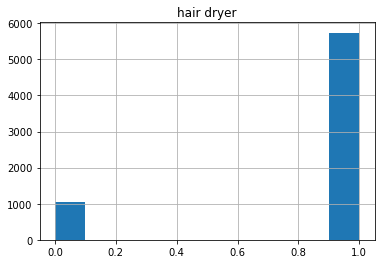

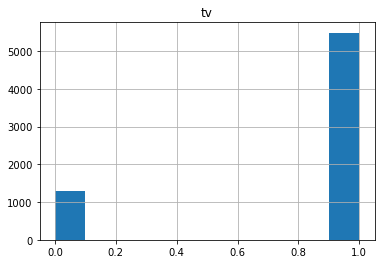

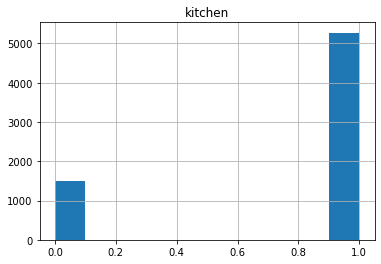

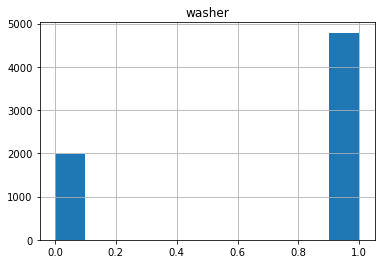

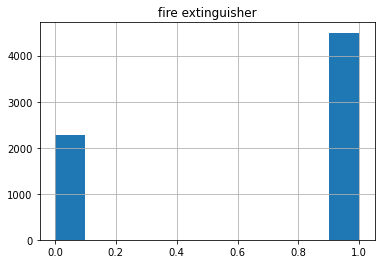

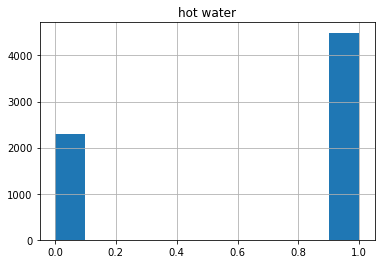

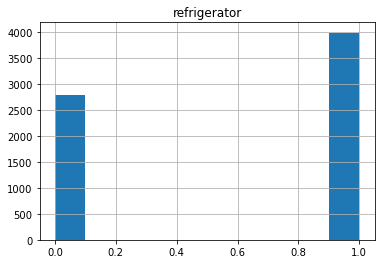

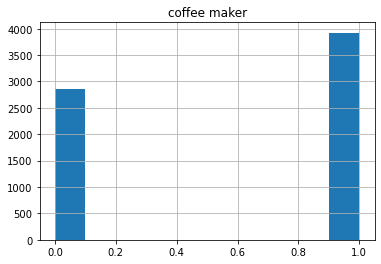

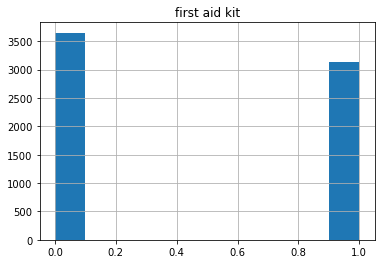

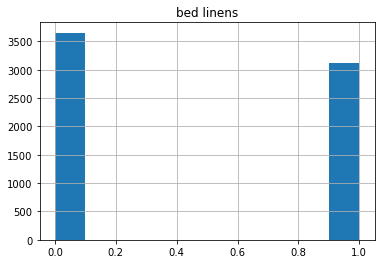

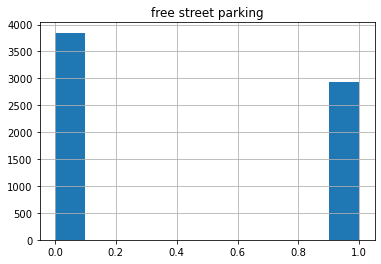

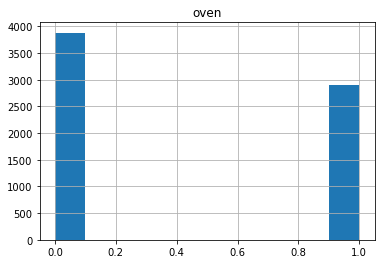

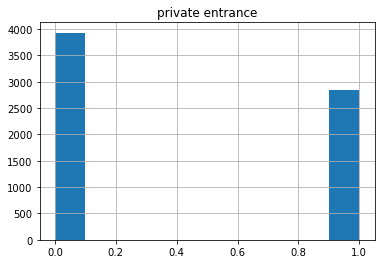

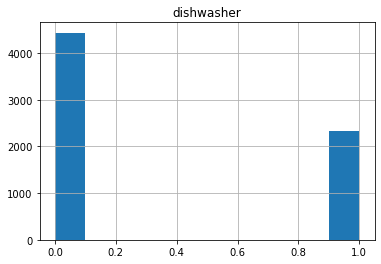

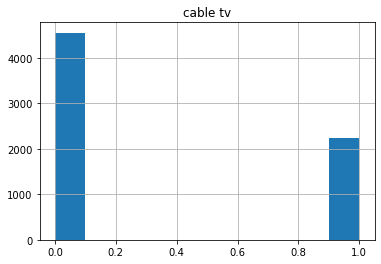

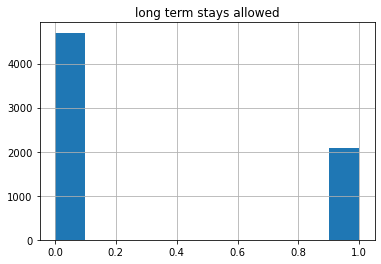

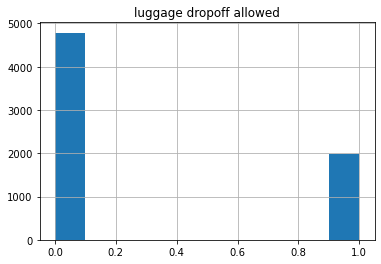

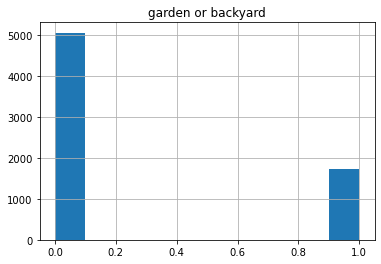

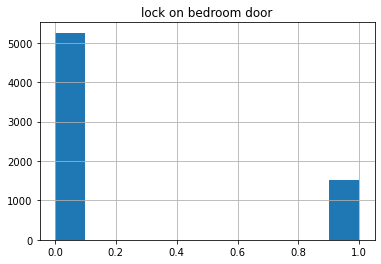

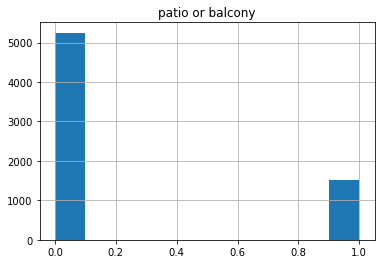

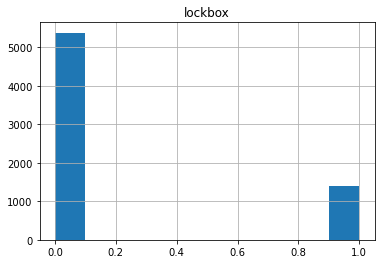

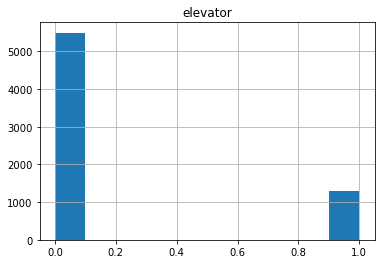

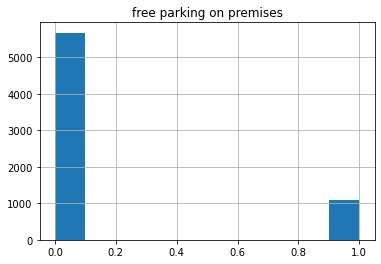

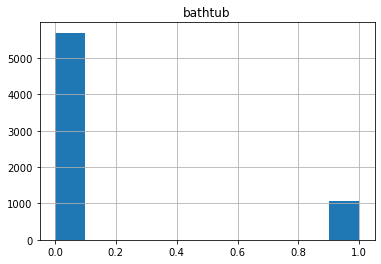

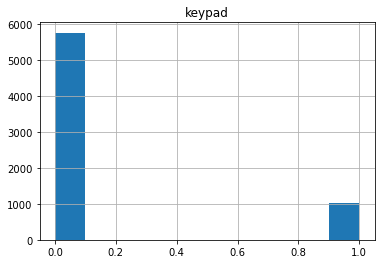

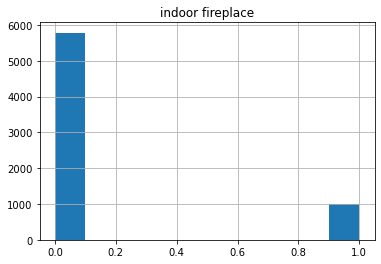

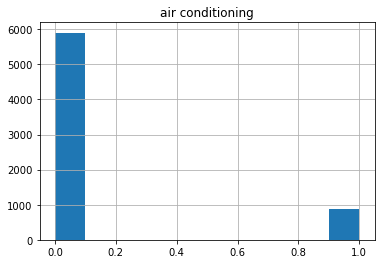

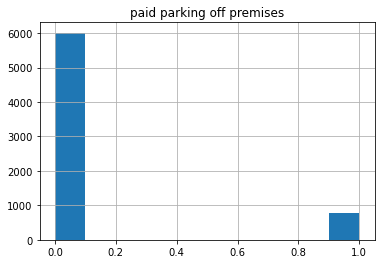

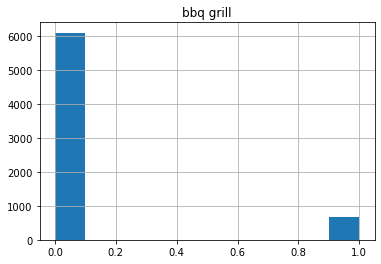

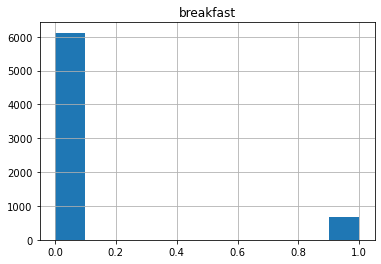

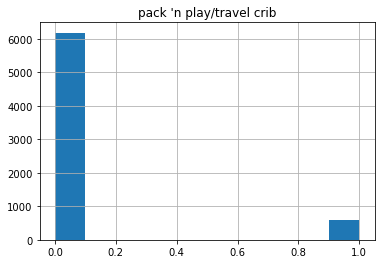

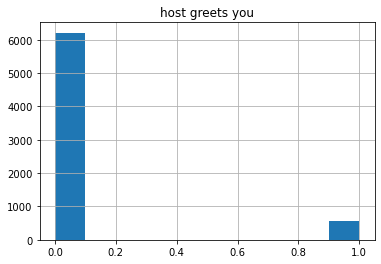

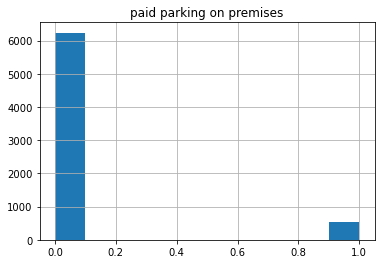

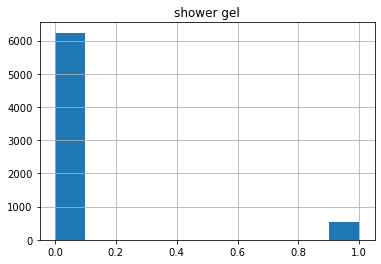

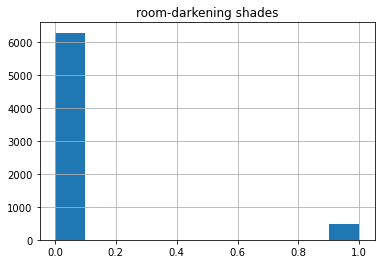

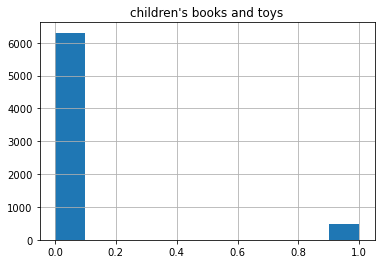

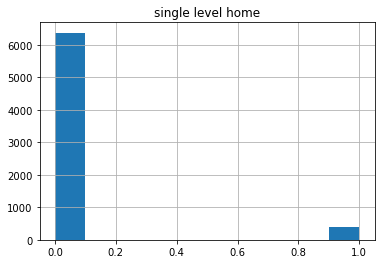

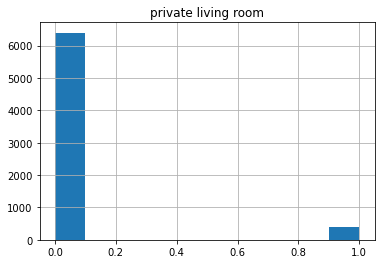

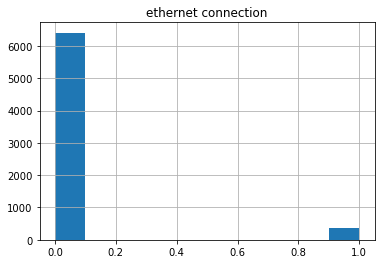

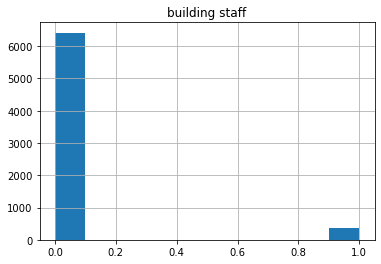

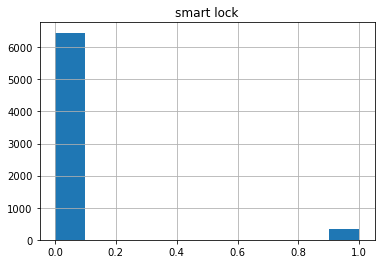

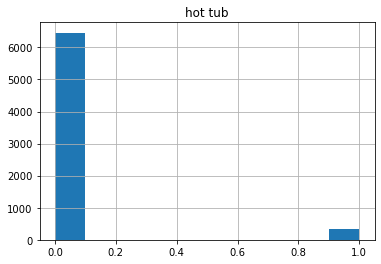

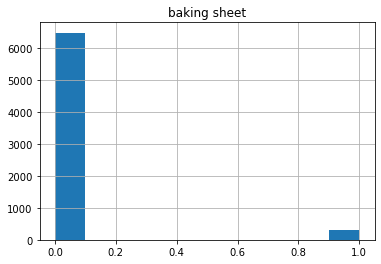

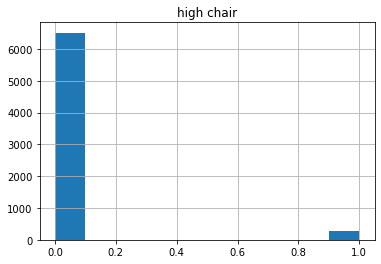

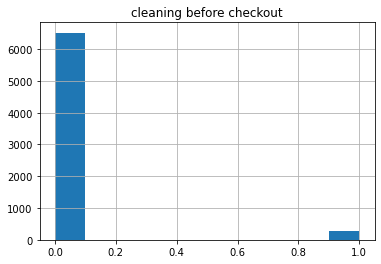

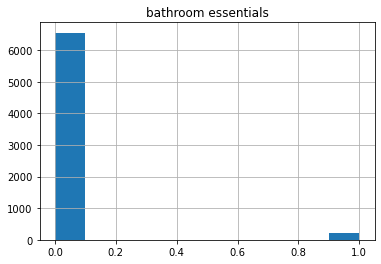

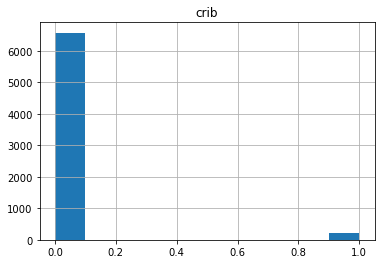

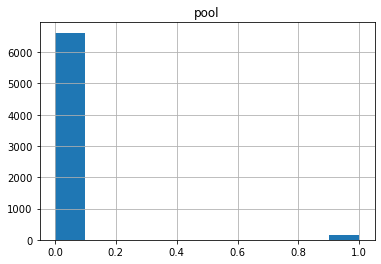

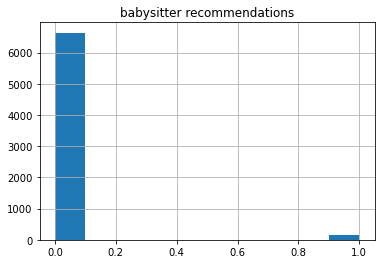

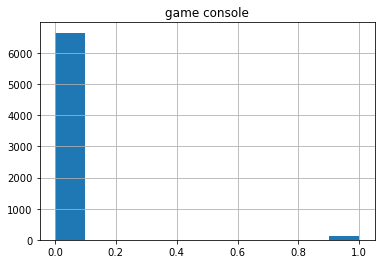

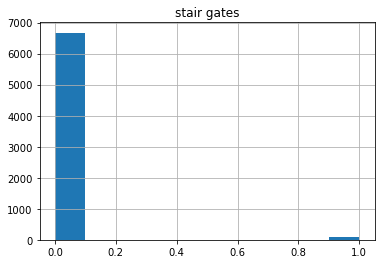

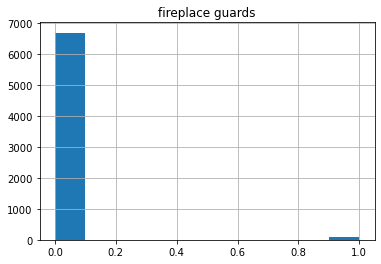

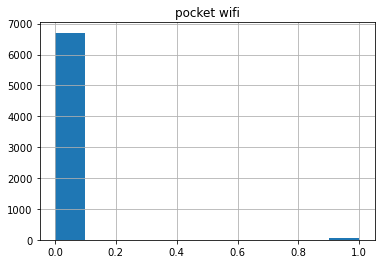

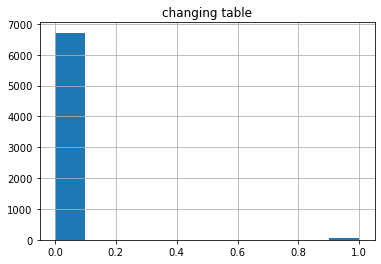

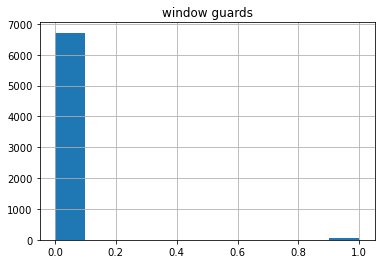

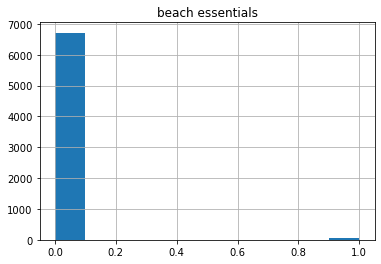

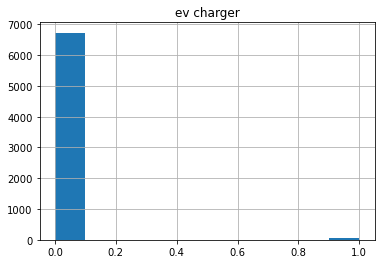

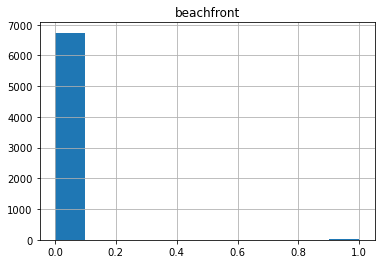

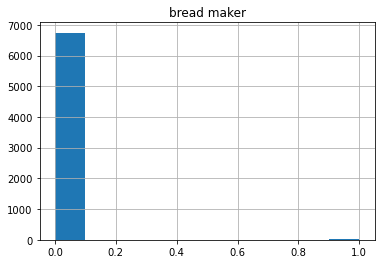

In [28]:
new_numeric_cols = []
for col in new_SF_df.columns: 
    if col in numeric_columns:
        new_numeric_cols.append(col)
        try:      
            new_SF_df[col] = pd.to_numeric(new_SF_df[col]) 
            new_SF_df.hist(column=col)
        except ValueError:
            print('This column can not be represented as a histogram')

# LassoCV Model

In [29]:
from sklearn.linear_model import Lasso, LassoCV

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [30]:
# R2 of Training set
lasso_model.score(X_train,y_train)

# Predict model on test data
y_pred = lasso_model.predict(X_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
print('MAE: %.3f' % mae(y_test, y_pred))

rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

MAE: 54.070
RMSE test: 77.996
R^2 test: 0.490


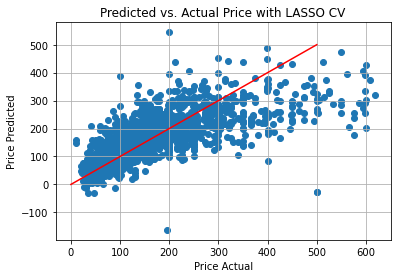

In [31]:
plt.scatter(y_test, y_pred)
plt.plot([0,500],[0,500],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with LASSO CV')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual');

# RidgeCV Model

In [32]:
from sklearn.linear_model import RidgeCV

reg_params = 10.**np.linspace(-10, 5, 10)
ridge_model = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
ridge_model.fit(X_train, y_train)

C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25085e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77992e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34899e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03739e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (r

RidgeCV(alphas=array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
       4.64158883e-04, 2.15443469e-02, 1.00000000e+00, 4.64158883e+01,
       2.15443469e+03, 1.00000000e+05]),
        cv=5)

In [33]:
# R2 of Training set
ridge_model.score(X_train,y_train)

# Predict model on test data
y_pred = ridge_model.predict(X_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
print('MAE: %.3f' % mae(y_test, y_pred))

rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

MAE: 54.518
RMSE test: 78.393
R^2 test: 0.485


Text(0.5, 0, 'Price Actual')

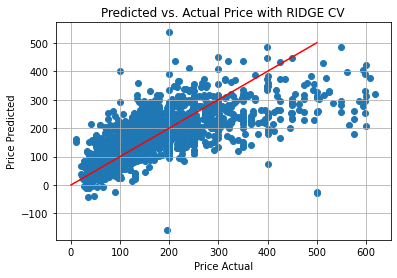

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([0,500],[0,500],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with RIDGE CV')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual')

# SVR

In [47]:
from sklearn.svm import SVR
SVRmodel = SVR(kernel = 'linear')
SVRmodel.fit(X_train, y_train)

y_pred = SVRmodel.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

RMSE test: 82.377
R^2 test: 0.431


In [48]:
from sklearn.svm import LinearSVR
LinearSVRmodel = LinearSVR()
LinearSVRmodel.fit(X_train, y_train)

y_pred = LinearSVRmodel.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

RMSE test: 82.863
R^2 test: 0.424


C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [49]:
from sklearn.svm import NuSVR
NuSVRmodel = NuSVR(kernel = 'linear')
NuSVRmodel.fit(X_train, y_train)

y_pred = NuSVRmodel.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

RMSE test: 80.740
R^2 test: 0.453


In [54]:
from sklearn.model_selection import train_test_split
y = new_SF_df[['price']] # target/dependent variable
x = new_SF_df.drop(['price','price_log'], axis =1) # independent variables

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [56]:
#feature scaling
from sklearn.preprocessing import StandardScaler
X_train_sc = StandardScaler()
y_train_sc = StandardScaler()
X_test_sc = StandardScaler()
y_test_sc = StandardScaler()

X_train_scaled = X_train_sc.fit_transform(X_train)
y_train_scaled = y_train_sc.fit_transform(y_train)
X_test_scaled = X_test_sc.fit_transform(X_test)
y_test_scaled = y_test_sc.fit_transform(y_test)

In [57]:
from sklearn.svm import NuSVR
NuSVRmodel = NuSVR(kernel = 'linear')
NuSVRmodel.fit(X_train_scaled, y_train_scaled)

y_pred = NuSVRmodel.predict(X_test_scaled)
rmse_rf= (mean_squared_error(y_test_scaled,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test_scaled, y_pred)))

C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSE test: 0.724
R^2 test: 0.475
